## About Dataset

**Content**

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

**Inspiration**

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

**Acknowledgement**

```Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019```

Link: https://www.kaggle.com/mohansacharya/graduate-admissions

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.api as smg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, logit

## Load data

In [2]:
admission = pd.read_csv("Admission.csv")
admission.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [4]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [5]:
admission.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


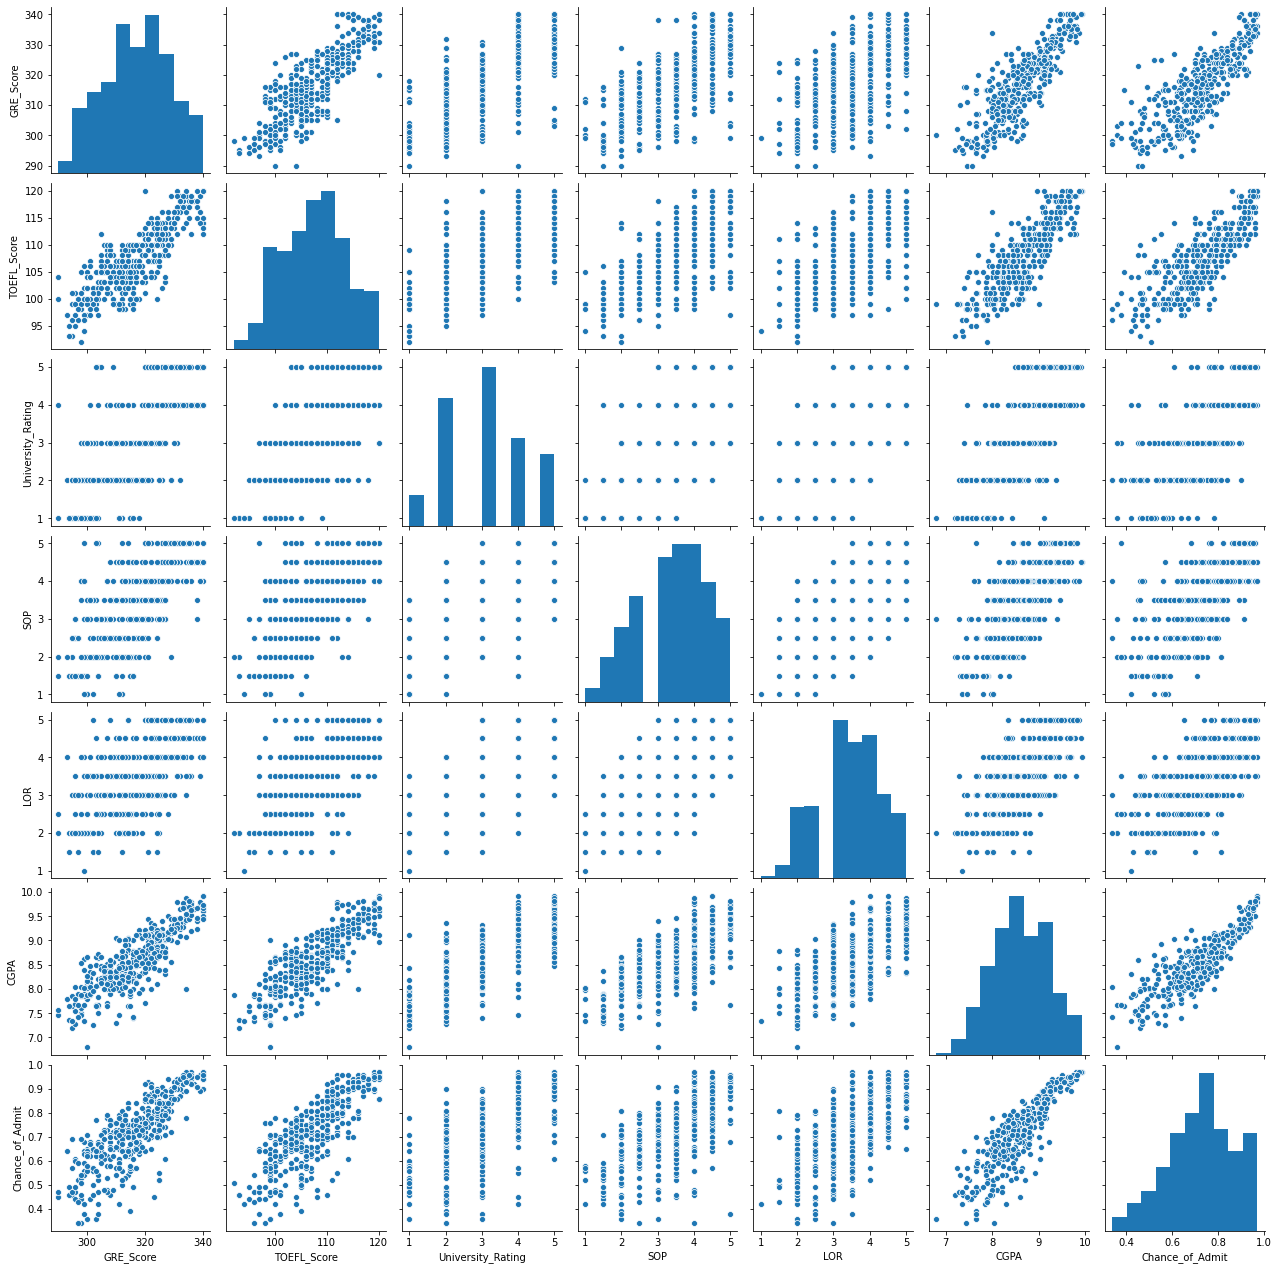

In [6]:
sns.pairplot(admission, vars = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit'])

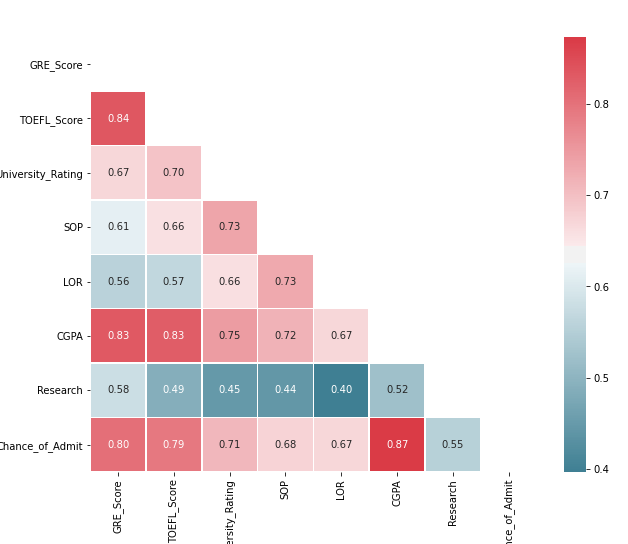

In [7]:
corr = admission.corr()

fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

In [8]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = admission.iloc[:,:-1]
calculate_vif(X)

,variables,VIF
0,GRE_Score,1438.451789
1,TOEFL_Score,1349.746948
2,University_Rating,22.143705
3,SOP,38.050177
4,LOR,38.411722
5,CGPA,1080.491179
6,Research,2.859938


In [9]:
X = admission.drop(['GRE_Score','TOEFL_Score', 'Chance_of_Admit', 'LOR', "SOP", "University_Rating"], axis=1)
calculate_vif(X)

,variables,VIF
0,CGPA,2.388169
1,Research,2.388169


## Fitting a Multiple Linear Regression Model

In [13]:
formula = "Chance_of_Admit ~ CGPA + C(Research, Treatment(reference = 0))"

mod = ols(formula, data = admission)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     686.6
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.34e-129
Time:                        21:54:51   Log-Likelihood:                 510.97
No. Observations:                 400   AIC:                            -1016.
Df Residuals:                     397   BIC:                            -1004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Fitting Logistic Regression

## Convert outcome variable to binary

In [3]:
admission["Admission_binary"] = np.where(admission.Chance_of_Admit > 0.7, 1, 0)
admission.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admission_binary
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [16]:
admission["Admission_binary"].value_counts()

1    235
0    165
Name: Admission_binary, dtype: int64

In [5]:
formula = "Admission_binary ~ CGPA + C(Research, Treatment(reference = 0))"

logit_mod = logit(formula, data = admission)
logit_model = logit_mod.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.346151
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       Admission_binary   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.4893
Time:                        10:53:34   Log-Likelihood:                -138.46
converged:                       True   LL-Null:                       -271.10
Covariance Type:            nonrobust   LLR p-value:                 2.479e-58
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -36.2

Text(0, 0.5, 'Admission probability')

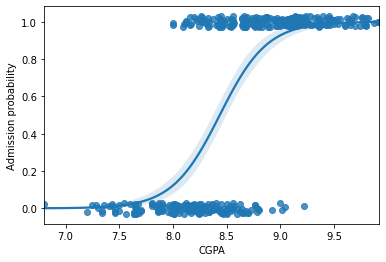

In [15]:
sns.regplot(x="CGPA", y="Admission_binary", data=admission,
                 logistic=True, y_jitter=.03)
plt.ylabel("Admission probability")

In [8]:
round(np.exp(logit_model.params), 3)

Intercept                                    0.000
C(Research, Treatment(reference=0))[T.1]     3.564
CGPA                                        69.143
dtype: float64

In [9]:
AME = logit_model.get_margeff(at = "overall", method = "dydx")
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:       Admission_binary
Method:                          dydx
At:                           overall
                                              dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
C(Research, Treatment(reference=0))[T.1]     0.1399      0.031      4.568      0.000       0.080       0.200
CGPA                                         0.4663      0.024     19.127      0.000       0.418       0.514
